**Dated 02/04/25: Aditi**
**, M.Tech. CSA**
**, 242211001**
**, Timestamp: 11.30 AM.**


***Loading the dataset***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))

Shape of X_train: (50000, 32, 32, 3)
Shape of X_test: (10000, 32, 32, 3)


***Visualisation and creating subsets.***

In [4]:
class_0_idx = np.where(y_train == 0)[0][:250]
class_1_idx = np.where(y_train == 2)[0][:250]

selected_idx = np.concatenate((class_0_idx, class_1_idx))
X_subset = X_train[selected_idx]
y_subset = y_train[selected_idx]

In [5]:
X_subset_flat = X_subset.reshape(X_subset.shape[0], -1)
X_subset_flat = X_subset_flat.astype('float32') / 255.0

In [6]:
from sklearn.model_selection import train_test_split
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset_flat, y_subset, test_size=0.2, random_state=42)

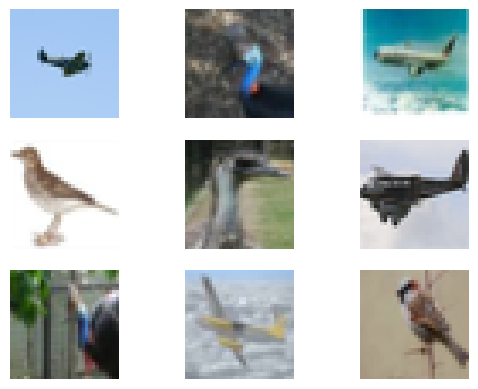

In [7]:
import matplotlib.pyplot as plt
rows = 3
cols = 3
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    image = X_train_subset[i].reshape(32, 32, 3)
    plt.imshow(image)
    plt.axis('off')
plt.show()

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\nn{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\nn{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_test, pred)}n")

***Applying logistic regression***

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train_subset, y_train_subset)
y_pred = logreg.predict(X_test_subset)
y_pred_proba = logreg.predict_proba(X_test_subset) if hasattr(logreg, "predict_proba") else None

In [11]:
accuracy = accuracy_score(y_test_subset, y_pred)
precision = precision_score(y_test_subset, y_pred, average='macro')
recall = recall_score(y_test_subset, y_pred, average='macro')
f1 = f1_score(y_test_subset, y_pred, average='macro')
roc_auc = roc_auc_score(y_test_subset, y_pred_proba[:, 1]) if y_pred_proba is not None else "Not Applicable"

In [12]:
print_score(logreg, X_train_subset, y_train_subset, X_test_subset, y_test_subset, train=True)
print("", end="\n\n")
print_score(logreg, X_train_subset, y_train_subset, X_test_subset, y_test_subset, train=False)
y_pred = logreg.predict(X_test_subset)
y_pred_proba = logreg.predict_proba(X_test_subset) if hasattr(logreg, "predict_proba") else None

Train Result:
Accuracy Score: 99.00%
_______________________________________________
CLASSIFICATION REPORT:
n                    0           2  accuracy   macro avg  weighted avg
precision    0.990196    0.989796      0.99    0.989996          0.99
recall       0.990196    0.989796      0.99    0.989996          0.99
f1-score     0.990196    0.989796      0.99    0.989996          0.99
support    204.000000  196.000000      0.99  400.000000        400.00
_______________________________________________
Confusion Matrix: n [[202   2]
 [  2 194]]n


Test Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
n                   0          2  accuracy   macro avg  weighted avg
precision   0.660000   0.740000       0.7    0.700000      0.703200
recall      0.717391   0.685185       0.7    0.701288      0.700000
f1-score    0.687500   0.711538       0.7    0.699519      0.700481
support    46.000000  54.000000       0.7  100.000000    100.000000

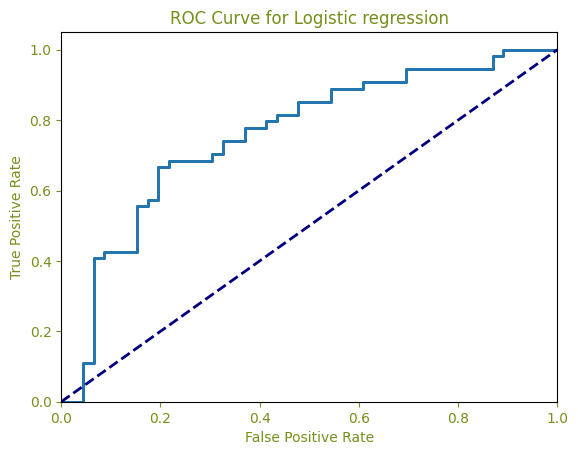

In [13]:
positive_class_probabilities = y_pred_proba[:, 1]
fpr, tpr, _ = roc_curve(y_test_subset.ravel(), positive_class_probabilities, pos_label=2)
plt.plot(fpr, tpr, lw=2, color='#4c5454')
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color='#74901d')
plt.ylabel('True Positive Rate', color='#74901d')
plt.title(f'ROC Curve for Logistic regression', color='#74901d')
plt.tick_params(colors='#74901d')
plt.show()


***Using PCA for SVM***

Text(0, 0.5, 'Second Principal Component')

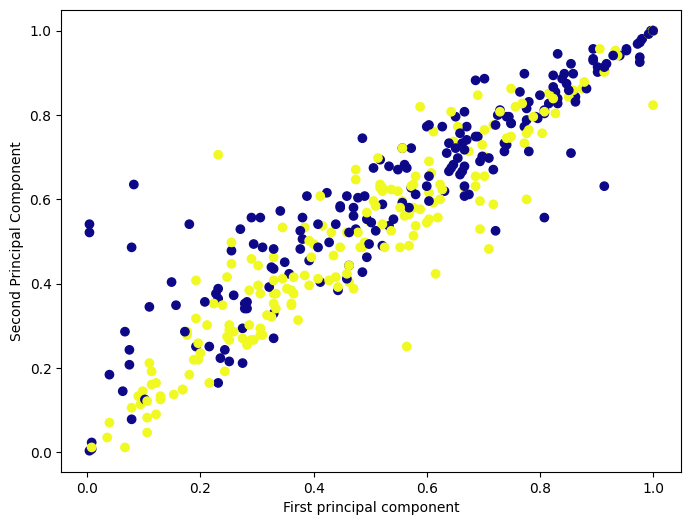

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=3)
scaler = StandardScaler()
X_train_pca = pca.fit_transform(X_train_subset)
X_test_pca = pca.transform(X_test_subset)
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
plt.figure(figsize=(8,6))
plt.scatter(X_train_subset[:,0],X_train_subset[:,1],c=y_train_subset,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [15]:
svm_clf = SVC(probability=True)

In [16]:
svm_clf.fit(X_train_pca, y_train_subset)
print_score(svm_clf, X_train_pca, y_train_subset, X_test_pca, y_test_subset, train=True)
print("", end="\n\n")
print_score(svm_clf, X_train_pca, y_train_subset, X_test_pca, y_test_subset, train=False)
y_pred = svm_clf.predict(X_test_pca)
y_pred_proba = svm_clf.predict_proba(X_test_pca) if hasattr(svm_clf, "predict_proba") else None

Train Result:
Accuracy Score: 80.75%
_______________________________________________
CLASSIFICATION REPORT:
n                    0           2  accuracy   macro avg  weighted avg
precision    0.782222    0.840000    0.8075    0.811111      0.810533
recall       0.862745    0.750000    0.8075    0.806373      0.807500
f1-score     0.820513    0.792453    0.8075    0.806483      0.806763
support    204.000000  196.000000    0.8075  400.000000    400.000000
_______________________________________________
Confusion Matrix: n [[176  28]
 [ 49 147]]n


Test Result:
Accuracy Score: 83.00%
_______________________________________________
CLASSIFICATION REPORT:
n                   0          2  accuracy   macro avg  weighted avg
precision   0.784314   0.877551      0.83    0.830932      0.834662
recall      0.869565   0.796296      0.83    0.832931      0.830000
f1-score    0.824742   0.834951      0.83    0.829847      0.830255
support    46.000000  54.000000      0.83  100.000000    100.000000

In [17]:
accuracy = accuracy_score(y_test_subset, y_pred)
precision = precision_score(y_test_subset, y_pred, average='macro')
recall = recall_score(y_test_subset, y_pred, average='macro')
f1 = f1_score(y_test_subset, y_pred, average='macro')
roc_auc = roc_auc_score(y_test_subset, y_pred_proba[:, 1]) if y_pred_proba is not None else "Not Applicable"

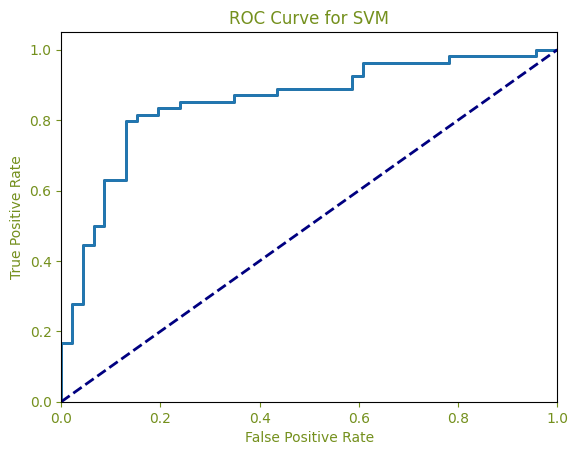

In [20]:
positive_class_probabilities = y_pred_proba[:, 1]
fpr, tpr, _ = roc_curve(y_test_subset.ravel(), positive_class_probabilities, pos_label =2)
plt.plot(fpr, tpr, lw=2, color='#4c5454')
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color='#74901d')
plt.ylabel('True Positive Rate', color='#74901d')
plt.title(f'ROC Curve for SVM', color='#74901d')
plt.tick_params(colors='#74901d')
plt.show()